<a href="https://colab.research.google.com/github/TabasomJebreili/predicting-markets-with-search-data/blob/main/Google_Trends_and_Data_Visualisation_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

## Project Overview

I wanted to explore whether people’s search behavior on Google reflects what’s happening in the real world—especially in economics and financial markets.  
So I collected search trends for keywords like **"Unemployment Benefits"**, **"Tesla"**, and **"Bitcoin"**, and compared them with actual data: the **U.S. unemployment rate**, **Tesla stock prices**, and **Bitcoin prices**.

## Data Sources

- [Google Trends](https://trends.google.com/trends/explore) – for search interest  
- [FRED - U.S. Unemployment Rate](https://fred.stlouisfed.org/series/UNRATE)  
- [Yahoo Finance - Tesla (TSLA)](https://finance.yahoo.com/quote/TSLA/history?p=TSLA)  
- [Yahoo Finance - Bitcoin (BTC-USD)](https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD)  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [ ]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

In [ ]:
df_tesla.tail()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
119,2020-05-01,16,167.000000
120,2020-06-01,17,215.962006
121,2020-07-01,24,286.152008
122,2020-08-01,23,498.320007
123,2020-09-01,31,407.339996


In [ ]:
type(df_tesla['MONTH'].loc[2])

str

In [ ]:
df_tesla['MONTH'] = pd.to_datetime(df_tesla.MONTH)

In [ ]:
df_tesla.describe()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124,124.000000,124.000000
mean,2015-07-17 05:48:23.225806336,8.725806,50.962145
min,2010-06-01 00:00:00,2.000000,3.896000
25%,2012-12-24 06:00:00,3.750000,7.352500
50%,2015-07-16 12:00:00,8.000000,44.653000
75%,2018-02-08 00:00:00,12.000000,58.991999
max,2020-09-01 00:00:00,31.000000,498.320007
std,NaN,5.870332,65.908389


In [ ]:
print(f'Largest value for Tesla in Web Search: ')
print(f'Smallest value for Tesla in Web Search: ')

Largest value for Tesla in Web Search: 
Smallest value for Tesla in Web Search: 


In [ ]:
df_tesla['TSLA_WEB_SEARCH'].min()

2

In [ ]:
df_tesla.shape

(124, 3)

### Unemployment Data

In [ ]:
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


In [ ]:
type(df_unemployment.MONTH[2])

str

In [ ]:
df_unemployment.MONTH = pd.to_datetime(df_unemployment.MONTH)

In [ ]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: ')

Largest value for "Unemployemnt Benefits" in Web Search: 


### Bitcoin

In [ ]:
df_btc_price.head()

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [ ]:
type(df_btc_price.DATE[2])

str

In [ ]:
df_btc_price.DATE = pd.to_datetime(df_btc_price.DATE)

In [ ]:
df_btc_search.head()

,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


In [ ]:
type(df_btc_search.MONTH[2])

str

In [ ]:
df_btc_search.MONTH = pd.to_datetime(df_btc_search.MONTH)

In [ ]:
df_btc_search['BTC_NEWS_SEARCH'].min()

3

In [ ]:
print(f'largest BTC News Search: ')

largest BTC News Search: 


# Data Cleaning

In [ ]:
df_btc_price.isna().values.any()

np.True_

In [ ]:
df_btc_price.isna().sum()

,0
DATE,0
CLOSE,1
VOLUME,1


In [ ]:
df_btc_price[df_btc_price.isna().any(axis=1)]

,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


In [ ]:
print(f'Missing values for Tesla?: ')
print(f'Missing values for U/E?: ')
print(f'Missing values for BTC Search?: ')

Missing values for Tesla?: 
Missing values for U/E?: 
Missing values for BTC Search?: 


In [ ]:
print(f'Missing values for BTC price?: ')

Missing values for BTC price?: 


In [ ]:
print(f'Number of missing values: ')

Number of missing values: 


In [ ]:
df_btc_price.dropna(inplace=True)

### Convert Strings to DateTime Objects

In [ ]:
df_btc_search.head()

,MONTH,BTC_NEWS_SEARCH
0,2014-09-01,5
1,2014-10-01,4
2,2014-11-01,4
3,2014-12-01,4
4,2015-01-01,5


### Monthly Data


In [ ]:
df_btc_price_monthly = df_btc_price.resample('M', on='DATE').last()

/tmp/ipython-input-3584729690.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_btc_price_monthly = df_btc_price.resample('M', on='DATE').last()


In [ ]:
df_btc_price_monthly.head()

,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,34707300.0
2014-10-31,338.321014,12545400.0
2014-11-30,378.046997,9194440.0
2014-12-31,320.192993,13942900.0
2015-01-31,217.464005,23348200.0


# Data Visualisation

In [ ]:
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01-01,34,5.7
1,2004-02-01,33,5.6
2,2004-03-01,25,5.8
3,2004-04-01,29,5.6
4,2004-05-01,23,5.6


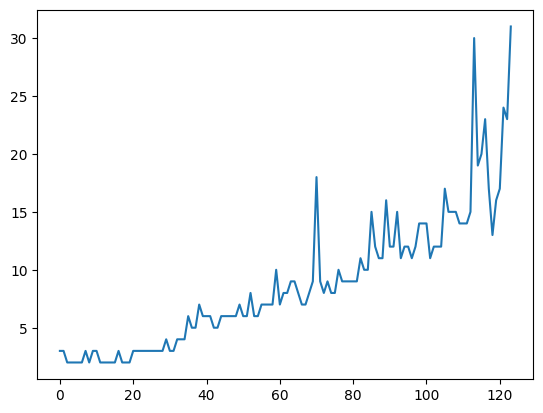

In [ ]:
plt.plot(df_tesla.index, df_tesla.TSLA_WEB_SEARCH)

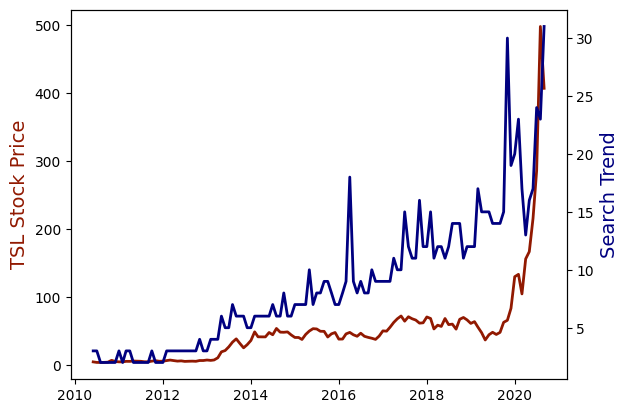

In [ ]:
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_ylabel("TSL Stock Price", color='#911901', fontsize=14)
ax2.set_ylabel("Search Trend", color='navy', fontsize=14)
ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, '#911901', linewidth=2)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, 'navy', linewidth=2)

In [ ]:
years = mdates.YearLocator()
month = mdates.MonthLocator()
years_fmt = mdates.DateFormatter("%Y")

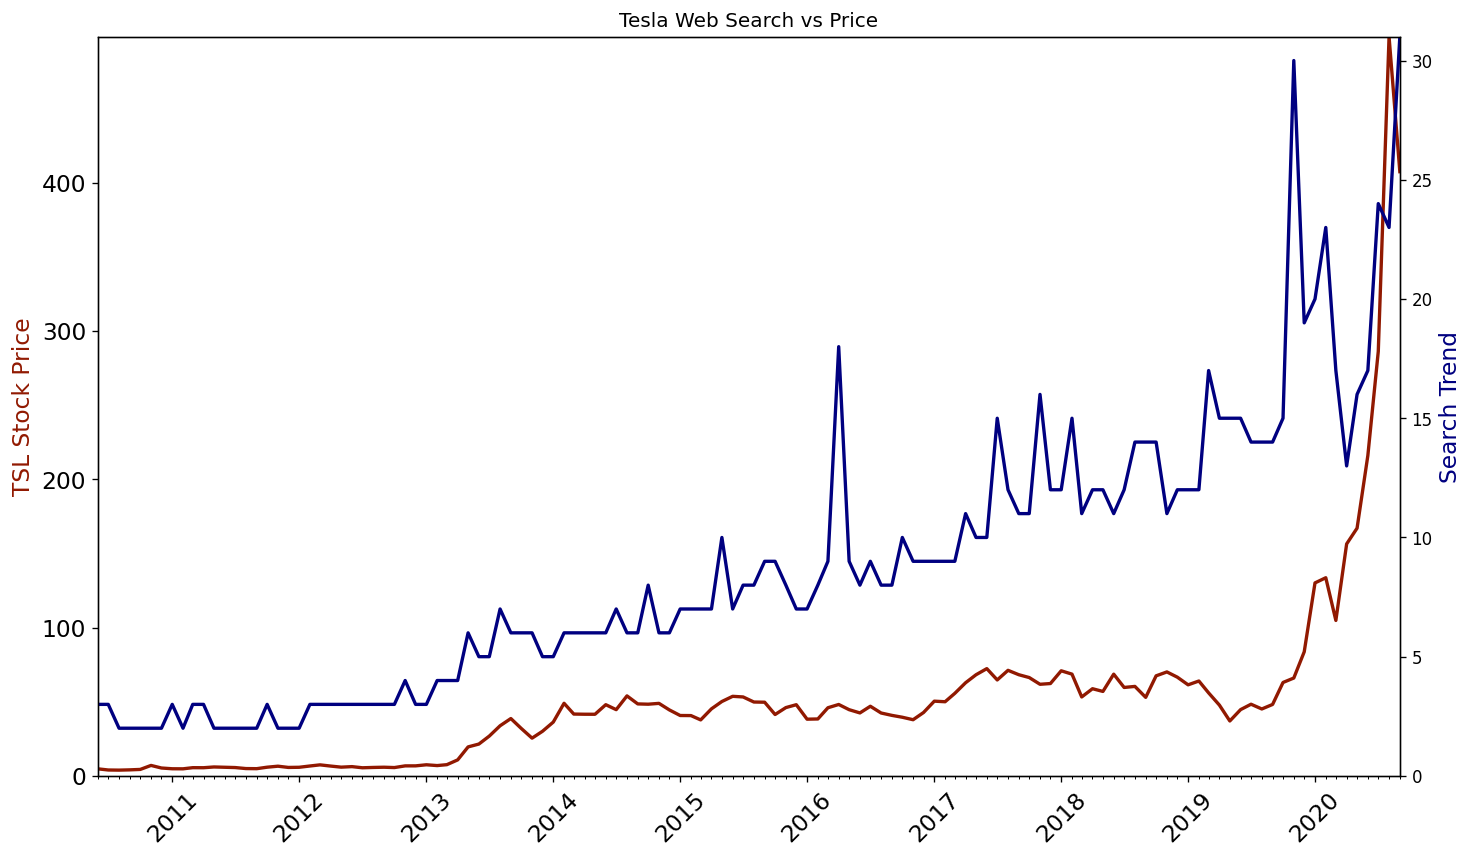

In [ ]:
plt.figure(figsize=(14,8), dpi=120)
plt.title("Tesla Web Search vs Price")
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(month)
ax1.set_ylabel("TSL Stock Price", color='#911901', fontsize=14)
ax2.set_ylabel("Search Trend", color='navy', fontsize=14)
ax1.set_xlim(df_tesla.MONTH.min(),df_tesla.MONTH.max() )
ax1.set_ylim(0,df_tesla.TSLA_USD_CLOSE.max())
ax2.set_ylim(0,df_tesla.TSLA_WEB_SEARCH.max())
ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, '#911901', linewidth=2)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, 'navy', linewidth=2)
plt.show()

### Bitcoin (BTC) Price v.s. Search Volume

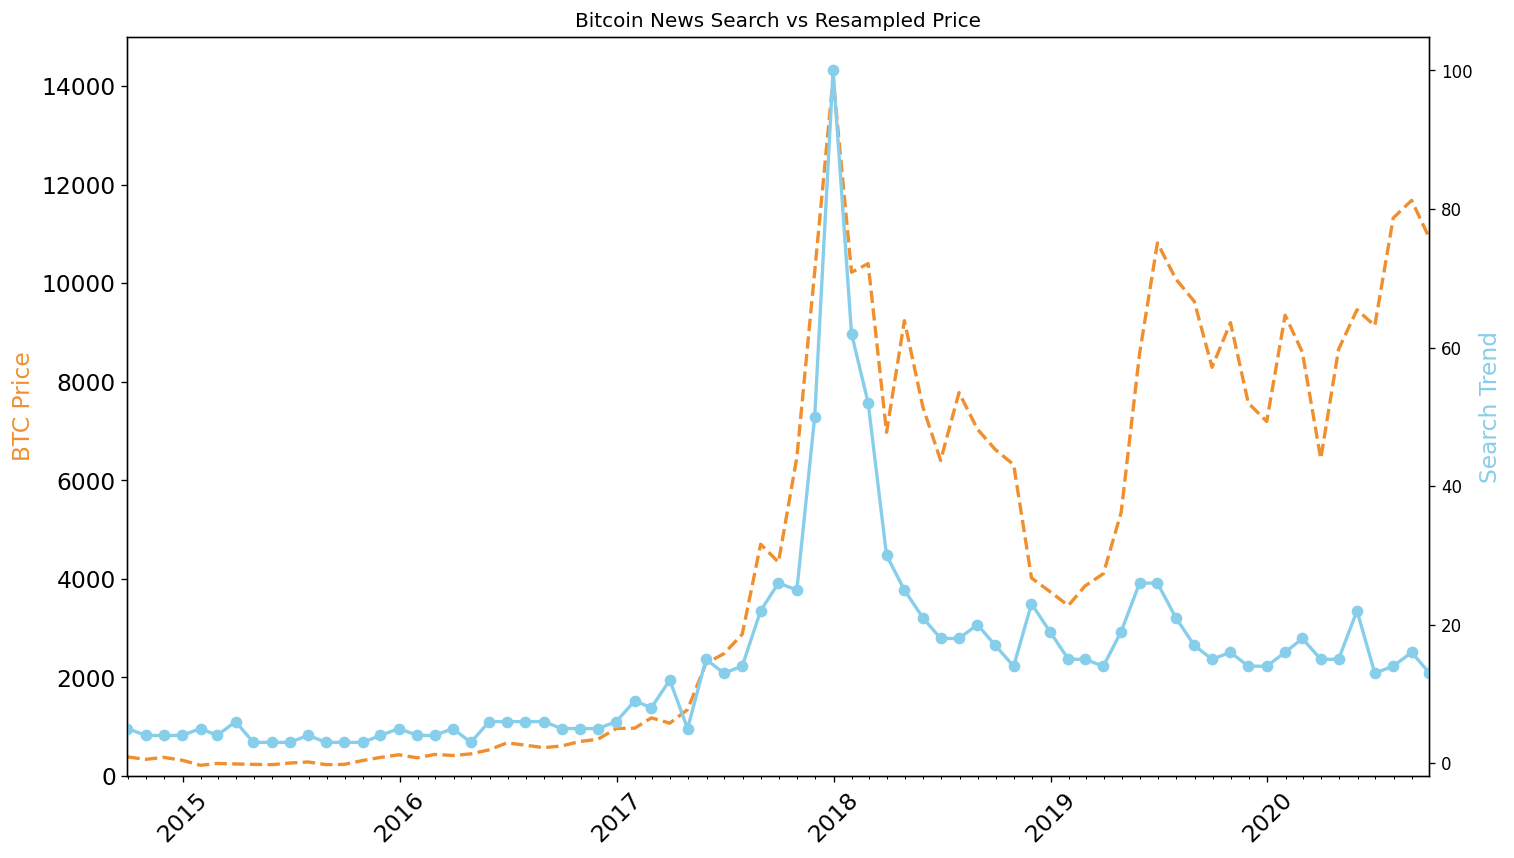

In [ ]:
plt.figure(figsize=(14,8), dpi=120)
plt.title("Bitcoin News Search vs Resampled Price")
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(month)
ax1.set_ylabel("BTC Price", color='#F08F2E', fontsize=14)
ax2.set_ylabel("Search Trend", color='skyblue', fontsize=14)
ax1.set_xlim(df_btc_price_monthly.index.min(),df_btc_price_monthly.index.max() )
ax1.set_ylim(bottom=0, top=15000)
ax1.plot(df_btc_price_monthly.index, df_btc_price_monthly.CLOSE, '#F08F2E', linewidth=2, linestyle='dashed')
ax2.plot(df_btc_price_monthly.index, df_btc_search.BTC_NEWS_SEARCH, 'skyblue', linewidth=2, marker="o")
plt.show()

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

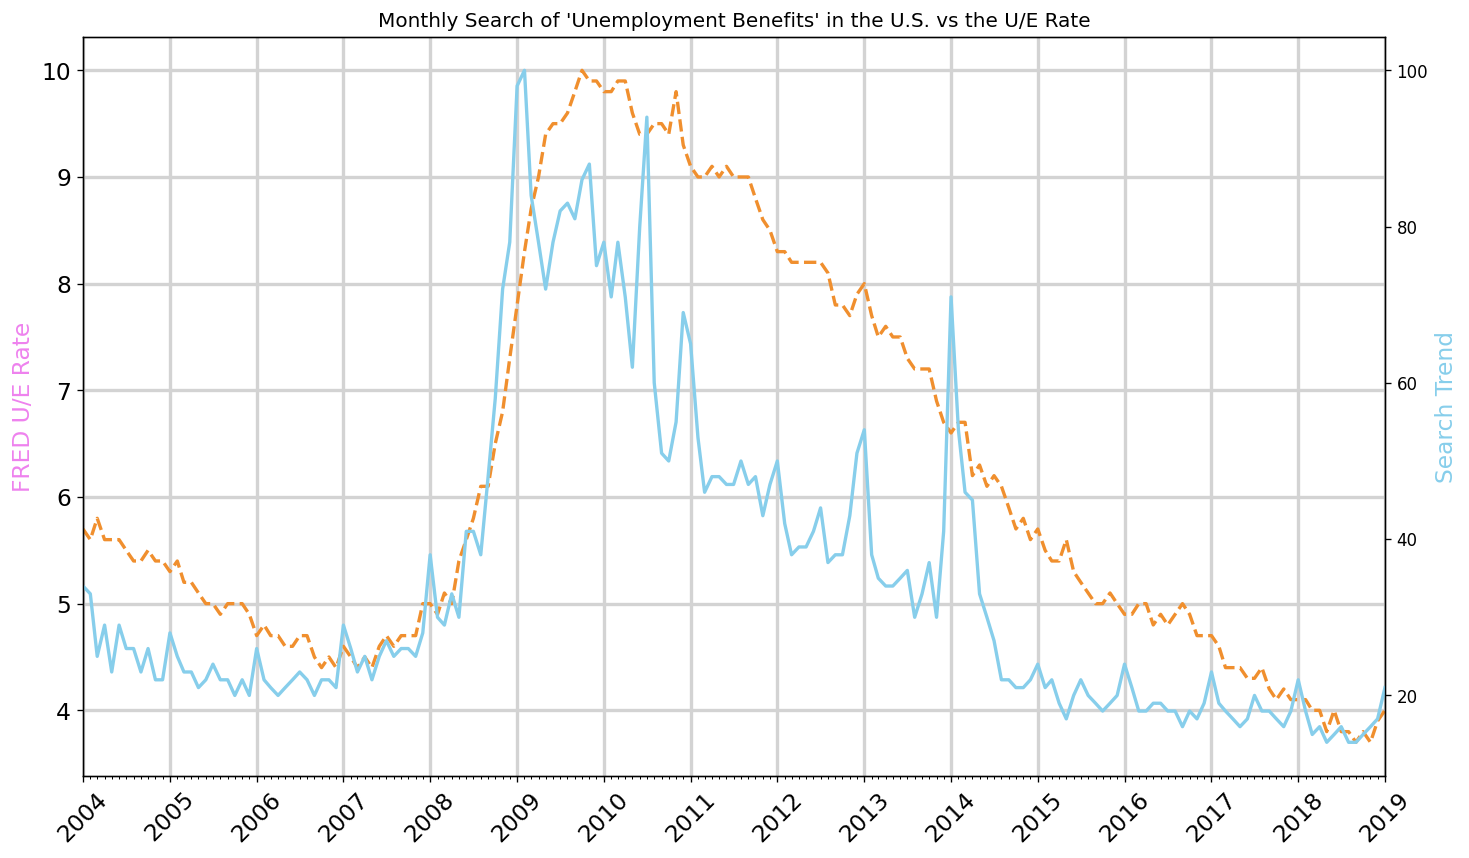

In [ ]:
plt.figure(figsize=(14,8), dpi=120)
plt.title("Monthly Search of 'Unemployment Benefits' in the U.S. vs the U/E Rate")
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(month)

ax1.set_ylabel("FRED U/E Rate", color='violet', fontsize=14)
ax2.set_ylabel("Search Trend", color='skyblue', fontsize=14)
ax1.set_xlim(df_unemployment.MONTH.min(),df_unemployment.MONTH.max() )

ax1.grid(color='lightgrey', linestyle='-', linewidth=2)

ax1.plot(df_unemployment.MONTH, df_unemployment.UNRATE, '#F08F2E', linewidth=2, linestyle='dashed')
ax2.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH, 'skyblue', linewidth=2)

plt.show()

Calculate and plot the 6-month rolling average of search interest for "Unemployment Benefits" alongside the actual U.S. unemployment rate to compare their trends over time.

In [ ]:
roll_unemplyment_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()

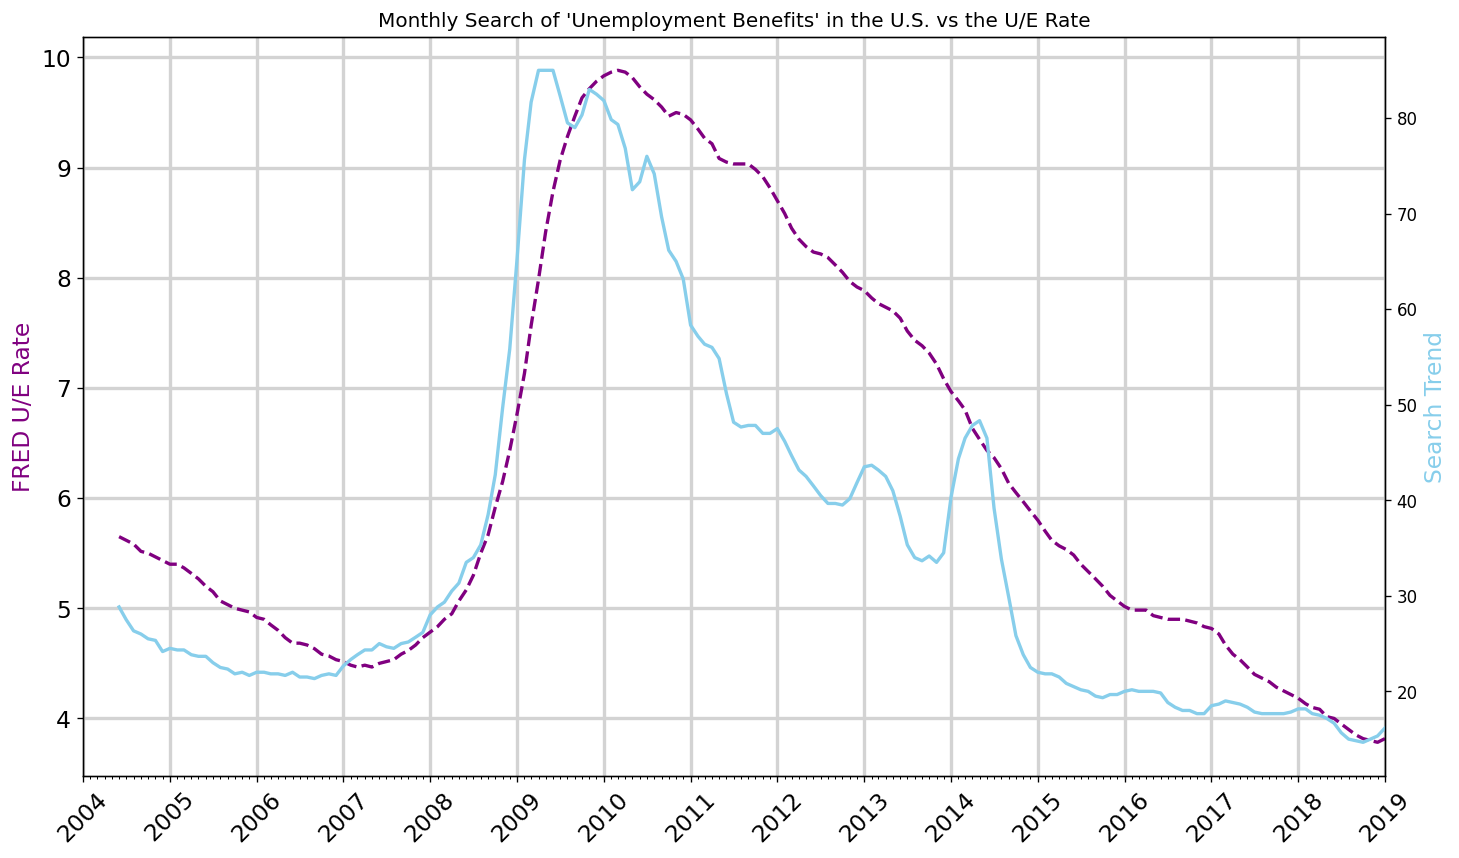

In [ ]:
plt.figure(figsize=(14,8), dpi=120)
plt.title("Monthly Search of 'Unemployment Benefits' in the U.S. vs the U/E Rate")
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(month)

ax1.set_ylabel("FRED U/E Rate", color='purple', fontsize=14)
ax2.set_ylabel("Search Trend", color='skyblue', fontsize=14)
ax1.set_xlim(df_unemployment.MONTH.min(),df_unemployment.MONTH.max() )

ax1.grid(color='lightgrey', linestyle='-', linewidth=2)

ax1.plot(df_unemployment.MONTH, roll_unemplyment_df.UNRATE, 'purple', linewidth=2, linestyle='dashed')
ax2.plot(df_unemployment.MONTH, roll_unemplyment_df.UE_BENEFITS_WEB_SEARCH, 'skyblue', linewidth=2)

plt.show()

### Including 2020 in Unemployment Charts

In [ ]:
added_df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-20.csv')

In [ ]:
added_df_unemployment.MONTH = pd.to_dat